In [1]:

## first run 
##pip install h5py==2.8.0
##pip install tensorflow==1.5.0 (I'm not kidding)



from keras.layers import Dense,Dropout, Activation, Flatten, Conv3D, MaxPooling3D 
#from keras.regularizers import Regularizer
from keras.regularizers import l1, l2, l1_l2
from keras.models import Sequential
from keras.optimizers import Adadelta
from keras.models import load_model
import pandas as pd

import os
import h5py

Using TensorFlow backend.


In [2]:
def create_model(model_para = [6, 12, 18, 18, 64, 0.01, 0.4,(5, 5, 5)],foldname = os.path.abspath('.') ):
    # input image dimensions
    
    #img_rows, img_cols, img_depth = 49,39,38
    # number of convolutional filters to use
    conv_l2 = 0.008
    
    full_l2  = 0.3
    # convolution kernel size
    kernel_size = (3,3,3)
    # size of pooling area for max pooling
    pool_size = (2, 2, 2)

    drop_out = (model_para[5], model_para[6])
    
    act_function = 'tanh'
    
    full_connect = model_para[4]
    
    nb_filters = (model_para[0], model_para[1], model_para[2], model_para[3])
#    nb_filters = (5, 10, 15, 15)
    l1_regularizer = 0.01
    
    l2_regularizer = full_l2
    
    nb_classes = 2
    
    #input_shape = (1, 40, 48, 48)
    input_shape = (40, 48, 48, 1)
    
    #wr = WeightRegularizer(l1=l1_regularizer,l2=l2_regularizer)
    kr = l1_l2(l1=l1_regularizer, l2=l2_regularizer)
    
    
    
    #create cnn model
    model = Sequential()
    
    
    #keras.layers.Conv3D(filters, kernel_size, strides=(1, 1, 1), padding='valid', 
    #data_format=None, dilation_rate=(1, 1, 1), activation=None, use_bias=True, 
    #kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, 
    #bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
   
    #model.add(Conv3D(filters = 1,kernel_size = 3, strides = 1, activation = 'tanh', input_shape = (50, 41, 40, 1)))
    
    # need to specify data_format='channels_first' 
    
    model.add(Conv3D(nb_filters[0], kernel_size[0], kernel_size[1],kernel_size[2],W_regularizer = l2(conv_l2),
                                activation = act_function , input_shape=input_shape, data_format='channels_last'))
    
    model.add(MaxPooling3D(pool_size=pool_size)) 
    
    model.add(Dropout(drop_out[0]))

    model.add(Conv3D(nb_filters[1], kernel_size[0], kernel_size[1], kernel_size[2],W_regularizer = l2(conv_l2),
                                   activation = act_function))
    
    model.add(MaxPooling3D(pool_size=pool_size))
    
    model.add(Dropout(drop_out[0]))
    
    model.add(Conv3D(nb_filters[2], kernel_size[0], kernel_size[1], kernel_size[2],W_regularizer = l2(conv_l2),
                                    activation = act_function))  
    
    model.add(MaxPooling3D(pool_size=pool_size))    

    model.add(Dropout(drop_out[0]))
    
    
    model.add(Conv3D(nb_filters[3], kernel_size[0], kernel_size[1], kernel_size[2],W_regularizer = l2(conv_l2),
                            activation = act_function))
    #model.add(MaxPooling3D(pool_size=pool_size))    

    model.add(Dropout(drop_out[1]/2))

    model.add(Flatten())
    
    #model.add(Dense(full_connect, W_regularizer = wr,activation = act_function))

    model.add(Dropout(drop_out[1]))
    
    model.add(Dense(nb_classes,activation = act_function))
    
    
    
    model.add(Activation('softmax'))
    #model.add(Activation(act_function))
    model.summary()

    ADA = Adadelta(lr = 2.0, rho=0.95)

    model.compile(loss= 'categorical_crossentropy',
              optimizer= ADA,
              metrics=['accuracy'])

    

##    save parameters of cnn model to .txt             
    sname = 'model_parameter.txt'
    full_namem = os.path.join(foldname,sname)
    fm = open(full_namem,'w')
    fm.write('************CNN model parameter************ '+'\n')
    fm.write('Number of Convolution layer :     '+str(len(nb_filters))+'\n')
    fm.write('Input shape :                     '+str(input_shape)+'\n')
    fm.write('Number of kernal per layer ï¼?    '+str(nb_filters)+'\n')
    fm.write('Kernel size per layer :           '+str(kernel_size)+'\n')
    fm.write('Pool size per layer :             '+str(pool_size)+'\n')
    fm.write('Activation function per layer :   '+act_function+'\n')
#    fm.write('Dropout rate :                    '+str(drop_out)+'\n')
    fm.write('Number of full-connect layer :    '+str(full_connect)+'\n')
    fm.write('Coefficient of L1 regularizer :   '+str(l1_regularizer)+'\n')
    fm.write('Coefficient of L2 regularizer :   '+str(l2_regularizer)+'\n')
    fm.write('Output :                          '+str(nb_classes)+' classes'+'\n')
    fm.close()

    return model

In [3]:
# do the file traversal
# do the downsample
# do the fit

import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt


#C:\Users\Reid\Desktop\dataSciPrinciples\finalProj\ADNI_Preproc\ADNI\AD\036_S_1001\2006-11-20_09_21_45.0.nii


#img = nib.load(adni_file_path)
#img_data = img.get_fdata()

#print(img.shape)
#print(type(img))
#img_np = np.array(img.dataobj)
#print(img_np.shape)
#print(type(img_np))


#img_np_ds = img_np[::2,::2,::2]
#print(img_np_ds.shape)

def get_patch(input_3D, patch_idx):
    if (patch_idx < 0 | patch_idx > 26):
        print("You have passed an incorrect patch index to get patch: "+ str(patch_idx))
    dim1_start_idxs = [0, 20, 40] 
    dim1_end_idxs =[40, 60, 80]
    dim2_start_idxs = [0, 24, 48] 
    dim2_end_idxs =[48, 72, 96]
    dim3_start_idxs = [0, 24, 48]
    dim3_end_idxs = [48, 72, 96]
    ii = int(patch_idx / 9)
    jj = int( (patch_idx %9)  / 3)
    kk = int(patch_idx % 3)
    return input_3D[dim1_start_idxs[ii]:dim1_end_idxs[ii],dim2_start_idxs[jj]:dim2_end_idxs[jj],dim3_start_idxs[kk]:dim3_end_idxs[kk]]


def get_sampleXY(path, patch_idx):
    img = nib.load(path)
    img_data = img.get_fdata()
    img_np = np.array(img.dataobj)
    img_np_ds = img_np[::2,::2,::2]
    x = get_patch(img_np_ds, patch_idx)
    #(batches, x, y, z, channels)
    x = x.reshape((1, 40, 48, 48, 1))
    isAD = "\\AD\\" in path
    y = np.array([[int(isAD), 1-int(isAD)]])
    return x, y
    
    



#patch_0 = get_patch(img_np_ds, 0)
#patch_0 = patch_0.reshape((1, 40, 48, 48, 1))
#print(patch_0.shape)

#patch_label = np.array([[1,0]])
#print(patch_label)
#print(patch_label.shape)
#result = model.predict(patch_0)


#sample_x, sample_y = get_sampleXY(adni_file_path, 0)

#model.fit(x=sample_x, y=sample_y, epochs=25) 
#model.fit(x= sample_x, y=sample_y, epochs=1)

#result = model.predict(sample_x)

#print(result)


In [4]:
def get_ad_nii_IDs():
    ad_nii_ids = []
    patients_path = os.getcwd() + "\\..\\..\\ADNI\\AD\\" 
    for patient_folder in os.listdir(patients_path):
        nii_path = os.path.join(patients_path, patient_folder)
        for nii in os.listdir(nii_path):
            file_path = os.path.join(nii_path, nii)
            ad_nii_ids.append(file_path)
    #print(len(ad_nii_ids))
    #print(ad_nii_ids)
    return ad_nii_ids
    
ad_nii_IDs = get_ad_nii_IDs()    
#print(len(ad_nii_IDs))
#print(ad_nii_IDs)


def get_nc_nii_IDs():
    nc_nii_ids = []
    patients_path = os.getcwd() + "\\..\\..\\ADNI\\CN\\" 
    for patient_folder in os.listdir(patients_path):
        nii_path = os.path.join(patients_path, patient_folder)
        for nii in os.listdir(nii_path):
            file_path = os.path.join(nii_path, nii)
            nc_nii_ids.append(file_path)
    #print(len(ad_nii_ids))
    #print(ad_nii_ids)
    return nc_nii_ids

nc_nii_IDs = get_nc_nii_IDs()    
#print(len(nc_nii_IDs))
#print(nc_nii_IDs)

#list(set(ad_nii_IDs).intersection(set(nc_nii_IDs)))


def create_train_test_split_nii_ids(ad_nii_IDs, nc_nii_IDs):
    ad_randVec = np.random.rand( len(ad_nii_IDs), 1) 
    #decide 80% for training, 20% for testing

    #print(type(train_indices))
    #print(len(train_indices))
    #print(train_indices[0])
    #print(train_indices[1])
    
    ad_train_indices = np.where(ad_randVec < 0.8)[0]
    ad_test_indices = np.where(ad_randVec >= 0.8)[0]
    
    nc_randVec = np.random.rand(len(nc_nii_IDs), 1) 
    
    nc_train_indices = np.where(nc_randVec < 0.8)[0]
    nc_test_indices = np.where(nc_randVec >= 0.8)[0]
    
    train_ad_IDs= []
    train_nc_IDs= []
    test_ad_IDs= []
    test_nc_IDs= []
    
    for index in ad_train_indices:
        train_ad_IDs.append(ad_nii_IDs[index])
    
    for index in nc_train_indices:
        train_nc_IDs.append(nc_nii_IDs[index])
    
    for index in ad_test_indices:
        test_ad_IDs.append(ad_nii_IDs[index])
    
    for index in nc_test_indices:
        test_nc_IDs.append(nc_nii_IDs[index])
        
        
    train_IDs = {'AD':train_ad_IDs, 'NC': train_nc_IDs }
    test_IDs = {'AD':test_ad_IDs, 'NC': test_nc_IDs }
    
    return train_IDs, test_IDs

In [5]:
test_IDs = ['C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\003_S_1059\\2008-12-23_09_15_12.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0053\\2007-11-29_12_31_01.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0183\\2007-04-03_12_25_27.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0183\\2007-04-03_12_42_38.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\012_S_0712\\2007-07-25_09_20_03.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\018_S_0286\\2007-05-15_09_24_51.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\018_S_0286\\2007-05-15_09_32_40.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\020_S_0213\\2006-03-22_13_33_31.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\020_S_0213\\2007-06-04_13_21_27.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0084\\2007-01-24_09_47_00.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0084\\2006-01-04_08_51_47.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0084\\2008-01-22_08_09_44.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0916\\2007-09-28_10_07_05.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_1262\\2008-04-02_08_41_46.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_1262\\2009-03-13_08_38_41.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_1262\\2007-02-09_08_36_16.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_1289\\2007-02-12_11_41_49.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\035_S_0341\\2008-04-24_14_23_37.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\003_S_0931\\2006-10-11_11_49_21.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\010_S_0420\\2006-06-15_15_41_24.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\010_S_0420\\2006-06-15_16_05_36.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\011_S_0002\\2005-08-26_08_45_00.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\012_S_1133\\2007-01-12_11_30_59.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\012_S_1133\\2007-01-12_11_21_49.0.nii.gz',  'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\016_S_0538\\2006-12-15_16_54_13.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\016_S_0538\\2006-08-02_11_02_27.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\020_S_0097\\2006-01-12_10_30_14.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\023_S_0926\\2006-09-27_12_09_35.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\032_S_1169\\2006-12-21_08_59_25.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\032_S_1169\\2006-12-21_08_50_09.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\036_S_0813\\2006-08-25_10_11_42.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\036_S_0813\\2010-10-05_15_31_10.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\041_S_0898\\2006-10-18_10_33_26.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\057_S_0779\\2006-08-16_13_05_14.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\057_S_0934\\2006-10-04_14_02_01.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\003_S_1059\\2006-11-09_17_28_06.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\003_S_1257\\2007-03-01_10_20_36.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0183\\2006-03-03_12_21_01.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0183\\2008-04-09_12_54_26.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0053\\2005-11-14_09_04_44.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0053\\2006-11-28_12_33_23.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0053\\2007-11-29_12_56_08.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\032_S_1101\\2006-11-21_11_41_21.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\032_S_1101\\2006-11-21_11_50_37.0.nii.gz']
train_IDs = ['C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\003_S_1257\\2008-05-15_13_41_31.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\010_S_0829\\2007-02-08_14_25_09.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\010_S_0829\\2007-02-08_14_33_41.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0003\\2005-09-01_10_33_55.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0003\\2006-09-12_12_24_48.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0003\\2007-09-12_12_48_32.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0010\\2005-11-07_08_19_30.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0010\\2006-11-09_12_01_54.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\011_S_0010\\2007-11-07_12_23_57.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\012_S_0689\\2007-07-19_10_48_16.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\012_S_0689\\2007-07-19_10_57_26.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\012_S_0712\\2007-07-25_09_02_14.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\012_S_0712\\2007-07-25_09_11_22.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\012_S_0720\\2007-08-21_10_35_07.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\012_S_0720\\2007-08-21_10_43_51.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\012_S_0803\\2006-09-22_07_58_57.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\012_S_0803\\2006-09-22_08_07_49.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\013_S_0592\\2006-08-17_15_07_00.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\013_S_0699\\2006-08-28_15_00_26.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\013_S_0996\\2006-11-06_14_53_40.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\013_S_0996\\2008-11-17_13_37_17.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\013_S_1161\\2006-12-20_14_34_30.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\013_S_1205\\2008-01-24_12_48_08.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\013_S_1205\\2009-03-16_16_09_31.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\013_S_1205\\2007-01-11_13_55_08.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\016_S_0991\\2006-11-01_14_40_40.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\016_S_0991\\2007-12-13_14_26_09.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\016_S_0991\\2009-04-22_16_02_55.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\016_S_1263\\2007-02-27_13_43_25.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\018_S_0633\\2008-09-25_11_37_32.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\018_S_0682\\2008-07-22_16_11_12.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\022_S_0007\\2005-09-13_11_30_12.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\022_S_0129\\2006-02-06_11_54_32.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\022_S_0129\\2008-02-19_10_33_04.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\022_S_0219\\2006-03-17_13_47_47.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\022_S_0543\\2006-05-22_09_27_24.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0083\\2007-01-08_12_50_12.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0083\\2008-01-31_09_08_41.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0083\\2005-12-14_08_30_26.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0093\\2006-01-03_08_54_30.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0093\\2007-02-13_10_37_18.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0093\\2008-01-28_15_05_27.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0139\\2006-01-24_11_12_57.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0139\\2007-02-09_09_34_44.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0139\\2007-02-09_09_55_08.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0139\\2008-03-04_07_32_59.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0916\\2006-09-22_14_14_58.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\023_S_0916\\2008-09-30_09_00_52.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\032_S_0147\\2007-02-19_15_06_33.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\032_S_0147\\2007-02-19_15_15_49.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\032_S_0400\\2006-04-17_11_44_52.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\032_S_0400\\2007-05-18_14_55_05.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\032_S_0400\\2007-05-18_15_04_21.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\032_S_0400\\2006-04-17_11_54_09.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\032_S_1037\\2006-11-02_10_31_19.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\032_S_1037\\2006-11-02_10_40_36.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\035_S_0341\\2006-04-06_10_28_57.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\035_S_0341\\2007-06-21_14_30_50.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\036_S_0577\\2006-05-26_12_09_33.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\036_S_0577\\2007-06-06_14_40_25.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\036_S_0577\\2008-05-29_13_12_44.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\036_S_0759\\2006-08-22_11_08_33.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\036_S_0759\\2007-08-30_12_08_53.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\036_S_0759\\2008-09-10_13_26_02.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\036_S_0760\\2006-08-25_11_11_22.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\036_S_0760\\2007-09-27_11_57_36.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\036_S_0760\\2008-10-07_12_46_02.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\036_S_1001\\2006-11-20_09_21_45.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\036_S_1001\\2006-11-20_09_47_56.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\036_S_1001\\2007-11-30_09_59_20.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\041_S_1368\\2007-03-05_10_29_58.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\041_S_1368\\2008-03-24_11_34_50.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\AD\\041_S_1368\\2009-03-16_09_28_42.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\003_S_0907\\2006-09-11_11_38_13.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\003_S_1021\\2006-11-01_11_29_25.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\010_S_0472\\2006-11-22_11_19_28.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\010_S_0472\\2006-11-22_11_30_27.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\011_S_0005\\2005-09-02_10_13_57.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\011_S_0008\\2005-09-13_13_26_10.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\011_S_0016\\2005-09-27_11_12_22.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\011_S_0021\\2005-10-10_13_12_17.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\011_S_0022\\2005-10-10_08_39_18.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\011_S_0023\\2005-10-31_09_18_49.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\011_S_0023\\2010-01-06_11_00_25.0.nii.gz','C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\012_S_1009\\2006-11-01_07_17_56.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\012_S_1009\\2006-11-01_07_26_40.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\012_S_1212\\2007-01-12_08_09_47.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\012_S_1212\\2007-01-12_08_18_28.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\013_S_0502\\2006-07-25_13_35_33.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\013_S_0575\\2006-08-14_14_59_59.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\013_S_1035\\2006-11-02_10_59_41.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\013_S_1276\\2007-03-05_13_31_20.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\016_S_0359\\2006-04-06_09_06_17.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\016_S_0359\\2010-11-04_11_04_56.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\018_S_0043\\2010-02-19_14_30_11.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\020_S_0883\\2006-09-15_13_03_24.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\020_S_0883\\2006-09-15_12_55_11.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\020_S_0899\\2006-09-25_19_44_35.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\020_S_1288\\2007-02-21_17_15_15.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\022_S_0014\\2005-09-29_15_36_16.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\022_S_0066\\2005-11-23_11_36_42.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\022_S_0096\\2006-01-18_12_32_57.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\022_S_0130\\2006-01-23_13_33_37.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\023_S_0031\\2005-10-12_15_48_09.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\023_S_0031\\2009-10-22_10_13_56.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\023_S_0058\\2005-11-30_09_36_10.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\023_S_0058\\2010-03-19_13_05_44.0.nii.gz',  'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\023_S_0061\\2005-11-29_08_54_05.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\023_S_0061\\2010-02-25_10_01_04.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\023_S_0081\\2006-01-10_08_27_21.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\023_S_0081\\2010-03-11_09_43_51.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\023_S_0926\\2010-10-27_12_19_05.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\023_S_0963\\2006-10-04_16_15_40.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\023_S_1190\\2007-01-08_16_43_31.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\023_S_1306\\2007-02-16_08_05_58.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\032_S_0479\\2006-05-15_12_17_39.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\032_S_0479\\2006-05-15_12_26_55.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\032_S_0479\\2010-07-07_09_10_00.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\032_S_0677\\2006-06-29_10_16_23.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\032_S_0677\\2006-06-29_10_25_39.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\032_S_0677\\2010-07-28_12_24_26.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\035_S_0048\\2005-11-22_13_31_20.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\035_S_0156\\2006-01-31_15_19_50.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\035_S_0156\\2010-02-22_16_54_56.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\035_S_0555\\2006-06-06_14_41_03.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\035_S_0555\\2006-11-14_07_22_47.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\035_S_0555\\2010-12-13_09_17_32.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\036_S_0576\\2006-06-01_16_25_20.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\036_S_0672\\2006-07-21_07_44_23.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\036_S_0672\\2010-12-06_11_59_55.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\036_S_1023\\2006-12-20_09_29_17.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\041_S_0125\\2006-01-13_13_00_31.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\041_S_0125\\2010-03-02_09_14_35.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\041_S_0125\\2010-03-02_09_40_09.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\041_S_0262\\2006-03-17_11_27_22.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\041_S_0262\\2006-03-17_11_17_57.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\041_S_0262\\2010-04-07_12_46_33.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\041_S_0262\\2010-04-07_13_12_49.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\041_S_1002\\2006-12-08_12_23_31.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\051_S_1123\\2006-12-15_10_20_28.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\057_S_0643\\2006-06-21_13_35_43.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\057_S_0818\\2006-09-06_13_54_55.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\062_S_0578\\2006-05-30_15_56_34.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\062_S_0768\\2006-08-02_09_18_44.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\062_S_1099\\2006-11-20_14_25_07.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\067_S_0019\\2005-10-12_10_40_27.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\067_S_0024\\2005-10-14_09_34_13.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\067_S_0056\\2005-11-09_09_25_54.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\067_S_0059\\2005-12-12_09_12_14.0.nii.gz', 'C:\\Users\\caleb\\Desktop\\Alz-Finders\\models\\..\\..\\ADNI\\CN\\067_S_0177\\2006-03-10_14_39_05.0.nii.gz']
len(test_IDs)
len(train_IDs)

150

In [11]:
import random

#print(train_IDs)

for epoch_number in range(23, 30):
    print("****EPOCH NUMBER " + str(epoch_number) + "****")
#epoch_number = epoch_number + 1
    random.shuffle(train_IDs)
    for neural_net_idx in range(27):
        print("NOW TRAINING NET NUMBER " + str(neural_net_idx))
        model = load_model(os.getcwd() + "\\model_weights\\saved_weights_net_" + str(neural_net_idx) + "_epoch_" + str(epoch_number-1) + ".h5")
        #samples_path = os.getcwd() + "\\..\\..\\ADNI\\AD\\"
        for nii_path in train_IDs:
            print("NOW TRAINING NET NUMBER " + str(neural_net_idx))
            x, y = get_sampleXY(nii_path, patch_idx=neural_net_idx) ## one brain patch == one datum == one example
            print(nii_path)
            model.fit(x=x, y=y);
        model.save(os.getcwd() + "\\model_weights\\saved_weights_net_" + str(neural_net_idx) + "_epoch_" + str(epoch_number) + ".h5")

****EPOCH NUMBER 23****
NOW TRAINING NET NUMBER 0
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\022_S_0219\2006-03-17_13_47_47.0.nii.gz
Epoch 1/1
1/1 [==============================] - 1s 687ms/step - loss: 0.7126 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\035_S_0156\2006-01-31_15_19_50.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7081 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\062_S_1099\2006-11-20_14_25_07.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7250 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\036_S_0759\2008-09-10_13_26_02.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7052 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\AD\023

NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\036_S_1023\2006-12-20_09_29_17.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7100 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0066\2005-11-23_11_36_42.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7053 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\032_S_0479\2006-05-15_12_17_39.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7049 - acc: 0.0000e+00
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\013_S_0575\2006-08-14_14_59_59.0.nii.gz
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.7038 - acc: 1.0000
NOW TRAINING NET NUMBER 0
C:\Users\caleb\Desktop\Alz-Finders\models\..\..\ADNI\CN\022_S_0014\2005-09-29_15_36_16.0.nii.gz
Epoch 1/1
1/1 

KeyboardInterrupt: 

In [54]:
df = pd.DataFrame()
df.to_csv("cnn_out_20_blind.csv")
labels = []
for neural_net_idx in range(27):
    vector = []
    print('Getting predictions for NN' + str(neural_net_idx))
    model = load_model(os.getcwd() + "\\model_weights\\saved_weights_net_" + str(neural_net_idx) + "_epoch_19.h5")
    for nii_path in train_IDs:
        
        x, y = get_sampleXY(nii_path, patch_idx=neural_net_idx)
        yhat = model.predict(x=x)
        #print(yhat)
        vector.append(yhat[0][0])
        #print(vector)
        if(neural_net_idx == 0 ):
            labels.append(y[0][0])
            
    df[str(neural_net_idx)] = vector
    #print(df)
    
df["Truth"] = labels
df.to_csv("cnn_out_20_blind.csv")


Getting predictions for NN0


KeyboardInterrupt: 

In [8]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [7]:
import pandas as pd

df = pd.read_csv('cnn_out_20_blind.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,24,25,26,Truth
0,0,0.509387,0.500629,0.499831,0.498434,0.500153,0.483391,0.788593,0.439439,0.500314,...,0.496945,0.501489,0.499929,0.513762,0.499473,0.499875,0.499608,0.500897,0.500032,1
1,1,0.509023,0.500618,0.499850,0.498435,0.500148,0.483310,0.631625,0.436612,0.500304,...,0.497171,0.501455,0.499915,0.514782,0.499460,0.499882,0.499597,0.500825,0.500023,1
2,2,0.508978,0.500617,0.499851,0.498426,0.500147,0.483343,0.698139,0.436643,0.500304,...,0.497177,0.501450,0.499915,0.514723,0.499458,0.499882,0.499601,0.500818,0.500023,1
3,3,0.509955,0.500635,0.499829,0.498217,0.500160,0.483222,0.821644,0.440179,0.500309,...,0.496646,0.501524,0.499929,0.515409,0.499468,0.499862,0.499612,0.500939,0.500021,1
4,4,0.509825,0.500632,0.499832,0.498315,0.500156,0.483408,0.801483,0.439780,0.500306,...,0.496682,0.501507,0.499928,0.514020,0.499468,0.499866,0.499603,0.500910,0.500021,1


In [80]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV

y = df["Truth"]
x = df.drop('Truth', axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
xgb_model = xgb.XGBClassifier()

parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, .7, 0.8, .9, 1.0],
        'colsample_bytree': [.71, .72, .73, .74, .75, .76, .78, .79, .8],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=parameters, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(x,y), verbose=3, random_state=1001 )
random_search.fit(x, y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    3.7s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000013D48F93D58>,
          error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=4,
          param_distributions={'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.78, 0.79, 0.8], 'max_depth': [3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [81]:
report_best_scores(random_search.cv_results_, 1)

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 4, 'gamma': 5, 'colsample_bytree': 0.74}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'subsample': 0.6, 'min_child_weight': 5, 'max_depth': 3, 'gamma': 0.5, 'colsample_bytree': 0.75}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'subsample': 0.7, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 1, 'colsample_bytree': 0.72}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'subsample': 0.6, 'min_child_weight': 5, 'max_depth': 4, 'gamma': 5, 'colsample_bytree': 0.78}



In [82]:
from sklearn.metrics import roc_auc_score
import pickle

xgb_model = XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='auc',
                             subsample=.8, min_child_weight=5, max_depth=4, gamma=5, colsample_bytree=.74)

xgb_model.fit(x,y)
pickle.dump(xgb_model, open("xgb_model_XX_blind.pickle.dat", "wb"))

In [6]:
#Predict test set
import pandas as pd

df = pd.DataFrame()
df.to_csv("cnn_out_1_pred_blind.csv")

#all_test_IDs = test_IDs['AD'] + test_IDs['NC']
labels = []
for neural_net_idx in range(27):
    vector = []
    print('Getting predictions for NN' + str(neural_net_idx))
    model = load_model(os.getcwd() + "\\model_weights\\saved_weights_net_" + str(neural_net_idx) + "_epoch_17.h5")
    for nii_path in test_IDs:
        
        x, y = get_sampleXY(nii_path, patch_idx=neural_net_idx)
        yhat = model.predict(x=x)
        #print(yhat)
        vector.append(yhat[0][0])
        #print(vector)
        if(neural_net_idx == 0 ):
            labels.append(y[0][0])
            
    df[str(neural_net_idx)] = vector
    #print(df)
    
df["Truth"] = labels
df.to_csv("cnn_out_18_pred_blind.csv")

Getting predictions for NN0
Getting predictions for NN1
Getting predictions for NN2
Getting predictions for NN3
Getting predictions for NN4
Getting predictions for NN5
Getting predictions for NN6
Getting predictions for NN7
Getting predictions for NN8
Getting predictions for NN9
Getting predictions for NN10
Getting predictions for NN11
Getting predictions for NN12
Getting predictions for NN13
Getting predictions for NN14
Getting predictions for NN15
Getting predictions for NN16
Getting predictions for NN17
Getting predictions for NN18
Getting predictions for NN19
Getting predictions for NN20
Getting predictions for NN21
Getting predictions for NN22
Getting predictions for NN23
Getting predictions for NN24
Getting predictions for NN25
Getting predictions for NN26


In [15]:
import pickle
from sklearn.metrics import roc_auc_score

df = pd.read_csv('cnn_out_19_pred_blind.csv')
xgb_model = pickle.load(open("xgb_model.pickle.dat", "rb"))

y = df["Truth"]
x = df.drop('Truth', axis=1)

yhat = xgb_model.predict_proba(x)[:, 1]

roc_auc_score(y, yhat)


0.678649237472767

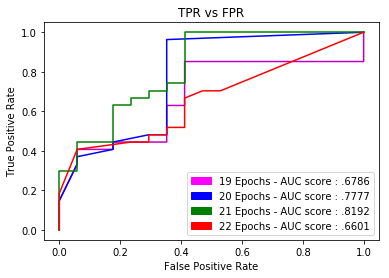

In [19]:
# 5 epochs = .5 ROC
# 10 epochs = .59 ROC
# 15 epochs = .5 ROC

from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


df = pd.read_csv('cnn_out_19_pred_blind.csv')
y = df["Truth"]
x = df.drop('Truth', axis=1)
yhat = xgb_model.predict_proba(x)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y, yhat, pos_label=1)
plt.plot(fpr, tpr, 'm', label='10 Epochs')
#plt.title("FPR vs TPR\nAUC=.6536")
fig2 = plt.gcf()
plt.draw()

df = pd.read_csv('cnn_out_20_pred_blind.csv')
y = df["Truth"]
x = df.drop('Truth', axis=1)
yhat = xgb_model.predict_proba(x)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y, yhat, pos_label=1)
plt.plot(fpr, tpr, 'b', label='11 Epochs')
#plt.title("FPR vs TPR\nAUC=.6754")
plt.title('TPR vs FPR')
fig3 = plt.gcf()
plt.draw()

df = pd.read_csv('cnn_out_21_pred_blind.csv')
y = df["Truth"]
x = df.drop('Truth', axis=1)
yhat = xgb_model.predict_proba(x)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y, yhat, pos_label=1)
plt.plot(fpr, tpr, 'g', label='15 Epochs')
#plt.title("FPR vs TPR\nAUC=.6754")
plt.title('TPR vs FPR')
fig3 = plt.gcf()
plt.draw()

df = pd.read_csv('cnn_out_22_pred_blind.csv')
y = df["Truth"]
x = df.drop('Truth', axis=1)
yhat = xgb_model.predict_proba(x)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y, yhat, pos_label=1)
plt.plot(fpr, tpr, 'r', label='15 Epochs')
#plt.title("FPR vs TPR\nAUC=.6754")
plt.title('TPR vs FPR')
fig3 = plt.gcf()
plt.draw()

mag_patch = mpatches.Patch(color='magenta', label='19 Epochs - AUC score : .6786')
blue_patch = mpatches.Patch(color='blue', label='20 Epochs - AUC score : .7777')
green_patch = mpatches.Patch(color='green', label='21 Epochs - AUC score : .8192')
red_patch = mpatches.Patch(color='red', label='22 Epochs - AUC score : .6601')

plt.legend(handles=[mag_patch, blue_patch, green_patch, red_patch])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#fig1.savefig('ROC_8.png')

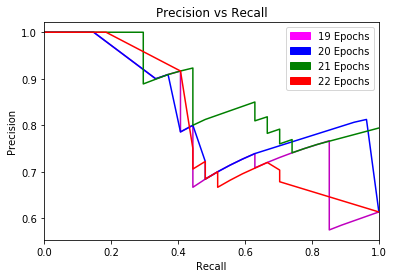

In [18]:
# 5 epochs = .5 ROC
# 10 epochs = .59 ROC
# 15 epochs = .5 ROC

from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


df = pd.read_csv('cnn_out_19_pred_blind.csv')
y = df["Truth"]
x = df.drop('Truth', axis=1)
yhat = xgb_model.predict_proba(x)[:, 1]
tpr, fpr, thresholds = metrics.precision_recall_curve(y, yhat, pos_label=1)
plt.plot(fpr,tpr, 'm', label='9 Epochs')
#plt.title("TPR vs FPR\nAUC = 0.6471")
fig1 = plt.gcf()
plt.draw()

df = pd.read_csv('cnn_out_20_pred_blind.csv')
y = df["Truth"]
x = df.drop('Truth', axis=1)
yhat = xgb_model.predict_proba(x)[:, 1]
tpr, fpr, thresholds = metrics.precision_recall_curve(y, yhat, pos_label=1)
plt.plot(fpr, tpr, 'b', label='10 Epochs')
#plt.title("FPR vs TPR\nAUC=.6536")
fig2 = plt.gcf()
plt.draw()

df = pd.read_csv('cnn_out_21_pred_blind.csv')
y = df["Truth"]
x = df.drop('Truth', axis=1)
yhat = xgb_model.predict_proba(x)[:, 1]
tpr, fpr, thresholds = metrics.precision_recall_curve(y, yhat, pos_label=1)
plt.plot(fpr, tpr, 'g', label='11 Epochs')
#plt.title("FPR vs TPR\nAUC=.6754")
plt.title('TPR vs FPR')
fig3 = plt.gcf()
plt.draw()

df = pd.read_csv('cnn_out_22_pred_blind.csv')
y = df["Truth"]
x = df.drop('Truth', axis=1)
yhat = xgb_model.predict_proba(x)[:, 1]
tpr, fpr, thresholds = metrics.precision_recall_curve(y, yhat, pos_label=1)
plt.plot(fpr, tpr, 'r', label='15 Epochs')
#plt.title("FPR vs TPR\nAUC=.6754")
plt.title('Precision vs Recall')
fig3 = plt.gcf()
plt.draw()

mag_patch = mpatches.Patch(color='magenta', label='19 Epochs')
blue_patch = mpatches.Patch(color='blue', label='20 Epochs')
green_patch = mpatches.Patch(color='green', label='21 Epochs')
red_patch = mpatches.Patch(color='red', label='22 Epochs')

plt.xlim((0,1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(handles=[mag_patch, blue_patch, green_patch, red_patch])

plt.show()

#fig1.savefig('ROC_8.png')

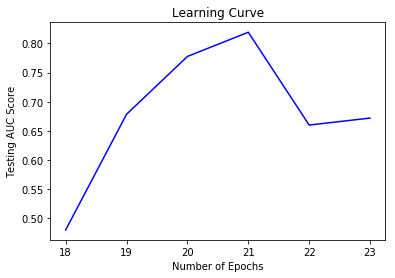

In [14]:
x = [18, 19, 20, 21, 22, 23]
y = [.4804, .6786, .7777, .8192, .6601, .6721]

plt.plot(x, y, 'b')
plt.xlabel('Number of Epochs')
plt.ylabel('Testing AUC Score')
plt.title('Learning Curve')

plt.show()